In [1]:
from numpy import *
from matplotlib.pyplot import *
import matplotlib.pylab as pylab
import matplotlib.lines as mlines
%matplotlib inline
pylab.rcParams['figure.figsize']= 16,5
import pandas as pd
import gc

In [2]:
def get_TS():
    rawData = pd.read_csv('Resources/Consulta_Banxico.csv', sep=',', encoding='latin1', skiprows=15, skip_blank_lines=True)
    Data = rawData.drop(rawData.index[:2])
    Data = Data.reset_index(drop = True)
    Data.columns = ['Fecha' , 'Tasa de crecimiento Mensual']
    TS = pd.Series(Data['Tasa de crecimiento Mensual'].astype(float))
    TS.index= Data['Fecha']
    del Data
    return TS

In [126]:
def plot_ValSolutions(PredictsList,Mean,TS,MeanRMSE,RMse,upperBound,lowerBound,time):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-25:len(TS)-12].copy()
    for x in PredictsList:
        TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-24:len(TS)-12])
        TSValPredictions[1:] = TSPredictions.copy()
        TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-25:len(TS)-12].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-24:len(TS)-12])
    TSMeanPred = TS[len(TS)-25:len(TS)-12].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-24:len(TS)-12])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-24:len(TS)-12])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp
    TSLower[1:] = TSlow
    TSUpper.plot(style = 'ro-')
    TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    in_N = '['
    
   # ax.set_title('in_N=[12,13], hi_N= [9,11,13], learn_R=[0.15,0.2,0.25], iter=[20,50]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse) + '         mean Time = ' + (str)(time) +'s')
    legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    fig.savefig("Results/iteraciones/Val_preds_2015_1.png")
    del fig
    gc.collect()

In [208]:
def plot_TestSolutions(PredictsList,Mean,TS,MeanRMSE,RMse,upperBound,lowerNound):
    """
    Function to Plot List of predictions, mean predictions and Original Time Serie
    :param PredictsList: List of predictions make
    :param Mean: Mean prediction
    :param TS: Original Time Serie
    :return: matplotlib fig
    """
    fig = figure()
    TSValPredictions = TS[len(TS)-13:len(TS)-6].copy()
    for x in PredictsList:
       TSPredictions = pd.Series(x.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
       TSValPredictions[1:] = TSPredictions.copy()
       TSValPredictions.plot(style = 'yo-')
    TSValOutputs = TS[len(TS)-13:len(TS)-6].copy()
    TSValOutputs.plot(style= 'ko-')
    TSMean = pd.Series(Mean.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
    TSMeanPred = TS[len(TS)-13:len(TS)-6].copy()
    TSMeanPred[1:] = TSMean
    TSMeanPred.plot(style= 'bo-')
    
    
    TSUp = pd.Series(upperBound.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
    TSlow = pd.Series(lowerBound.astype(float), index = TS.index[len(TS)-12:len(TS)-6])
    TSLower = TSMeanPred.copy()
    TSUpper = TSMeanPred.copy()
    TSUpper[1:] = TSUp
    TSLower[1:] = TSlow
    TSUpper.plot(style = 'ro-')
    TSLower.plot(style = 'ro-')
    
    ax = fig.add_subplot(111)
    ax.set_ylabel('Tasa de crecimiento')
    MSEtext = 'mean RMSE= ' + (str)(MeanRMSE) + '   RMSE = ' + (str)(RMse)
    
    
   # ax.set_title('in_N=[12,7], hi_N= [9,11,7], learn_R=[6.15,6.2,6.25], iter=[26,56]\n'+ MSEtext)
    
    
    linePred = mlines.Line2D([],[],color='yellow', marker='o',label = 'Predictions')
    lineMean = mlines.Line2D([],[],color='blue', marker='o',label = 'Mean Prediction')
    lineVal = mlines.Line2D([],[],color='black', marker='o',label = 'True Values')
    lineBounds = mlines.Line2D([],[],color='red', marker='o',label = 'Trust Bounds')
    title('mean RMSE= ' + (str)(MeanRMSE) + '        RMSE = ' + (str)(RMse))
    legend(handles = [linePred,lineMean,lineVal,lineBounds],loc= 1)
    fig.savefig("Results/iteraciones/Test_preds_2015_1.png")
    del fig
    gc.collect()

In [128]:
TS = get_TS()

In [129]:
def analyze_Val(predictions,TS,anotattion=False):
    predictions['RMSE'] = predictions['MSE'].apply(lambda x :  np.sqrt(x))
    MeanRMSE = predictions['RMSE'].mean()
    preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6','Pred7','Pred8','Pred9','Pred10','Pred11','Pred12']
    params = ['Param1','Param2','Param3','Param4','Param5']
    meanPred = np.mean(predictions[preds])
    upperBound = meanPred + MeanRMSE
    lowerBound = meanPred - MeanRMSE
    RMSE = np.sqrt(np.mean((TS[-24:-12].values-meanPred)**2))
    meanTime = predictions['Time'].mean()
    plot_ValSolutions(predictions[preds].as_matrix(),meanPred.as_matrix(),TS,MeanRMSE,RMSE,upperBound.as_matrix(),lowerBound.as_matrix(), meanTime)
    if(anotattion):        
        print "count = " + (str)(len(predictions))
        print "meanRMSE = " + (str)(MeanRMSE)
        print "true values = " + (str)(TS[-24:-12].values) 
        print "meanPreds = " + (str)(meanPred.values)
        print "RMSE of meanPreds = " + (str)(RMSE)
        print "Mean Time = " + (str)(meanTime)

In [253]:
def analyze_Test(test_predictions,TS,anotattion=False):
    #predictions['RMSE'] = predictions['MSE'].apply(lambda x :  np.sqrt(x))
    preds = ['Pred1','Pred2','Pred3','Pred4','Pred5','Pred6']
    params = ['Param1','Param2','Param3','Param4','Param5']
    test_predictions = test_predictions[test_predictions['Pred6']<15]
    test_predictions = test_predictions[test_predictions['Pred5']<15]
    test_predictions['RMSE'] = test_predictions['MSE'].apply(lambda x :  np.sqrt(x))
    meantestRMSE = test_predictions['RMSE'].mean()
    testmean = np.mean(test_predictions[preds])
    upperBound = testmean + meantestRMSE
    lowerBound = testmean - meantestRMSE
    testRMSE = np.sqrt(np.mean((TS[-12:-6].values-testmean)**2))
    plot_TestSolutions(test_predictions[preds].as_matrix(),testmean.as_matrix(),TS,meantestRMSE,testRMSE,upperBound.as_matrix(),lowerBound.as_matrix())
    if(anotattion):        
        print "count = " + (str)(len(test_predictions))
        print "meanRMSE = " + (str)(meantestRMSE)
        print "true values = " + (str)(TS[-12:-6].values) 
        print "meanPreds = " + (str)(testmean.values)
        print "RMSE of meanPreds = " + (str)(testRMSE)
        print "Mean Time = " + (str)(meanTime)

In [254]:
predictions = pd.read_csv("Results/iteraciones/Validation_predicions_2015_1.csv" )
predictions[:1]

,Param1,Param2,Param3,Param4,Param5,Pred1,Pred2,Pred3,Pred4,Pred5,Pred6,Pred7,Pred8,Pred9,Pred10,Pred11,Pred12,MSE,Time
0,100,-0.3,0.7,0.4,1.000000e-09,-4.499427,-0.362965,0.377643,-0.291235,0.031234,1.992765,2.479914,1.900663,0.795853,-0.061874,-0.657114,-0.798778,4.76471,67.351


count = 50
meanRMSE = 1.91064781101
true values = [-4.32 -5.13  4.33  0.62  1.6   3.32  2.53  4.13 -1.41  0.09 -1.86 -2.36]
meanPreds = [-3.36409965 -3.28346029  2.03386074  0.68703995  1.41778337  2.98656934
  2.5658083   1.8326272  -0.70299773 -0.92729799 -1.22815982 -1.31047036]
RMSE of meanPreds = 1.22675958697
Mean Time = 62.6137400007


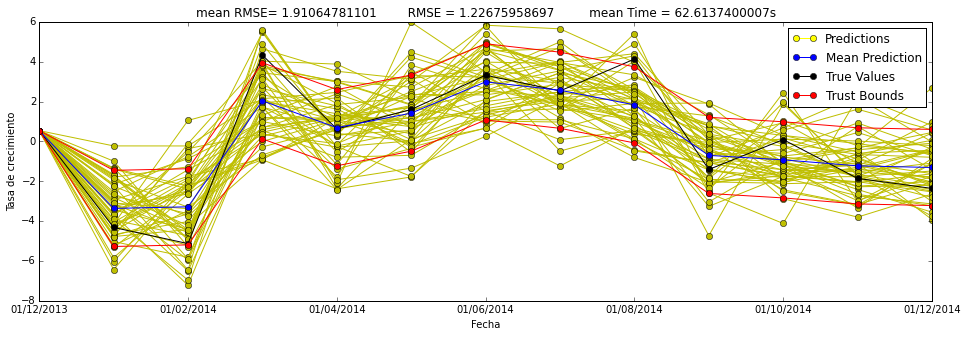

In [255]:
analyce_Val(predictions,True)

In [268]:
test_predictions = pd.read_csv("Results/iteraciones/Test_predicions_2015_1.csv" )

count = 48
meanRMSE = nan
true values = [-5.09  7.91 -1.05  1.96  0.27  0.78]
meanPreds = [-0.427364    0.41039264  0.47049259  0.71311435  0.28225126 -0.474208  ]
RMSE of meanPreds = 3.72880888814
Mean Time = 78.3967999935


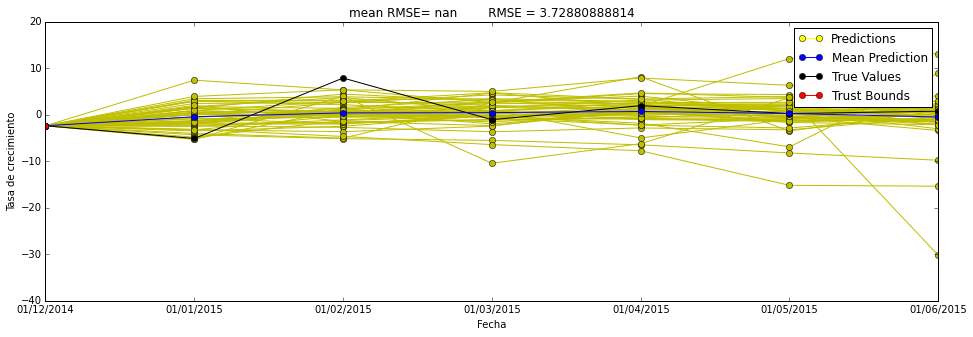

In [269]:
analyze_Test(test_predictions,TS,True)

In [221]:
test_predictions.min()

Param1                                                  0.4
Param2                                                1e-09
Param3    [[ 1.24769271  1.41579145  1.68276651  1.89170...
Param4    [[ 1.20856697]\r\n [ 1.3470729 ]\r\n [ 1.22163...
Param5    [[ 1.24769271  1.41579145  1.68276651  1.89170...
Pred1     [[ 1.20856697]\r\n [ 1.3470729 ]\r\n [ 1.22163...
Pred2     [[ 1.24769271  1.41579145  1.68276651  1.89170...
Pred3     [[ 1.20856697]\r\n [ 1.3470729 ]\r\n [ 1.22163...
Pred4     [[ 1.24769271  1.41579145  1.68276651  1.89170...
Pred5     [[ 1.20856697]\r\n [ 1.3470729 ]\r\n [ 1.22163...
Pred6     [[ 1.24769271  1.41579145  1.68276651  1.89170...
MSE       [[ 1.20856697]\r\n [ 1.3470729 ]\r\n [ 1.22163...
dtype: object

In [50]:
test_predictions[params]

,Param1,Param2,Param3,Param4,Param5
0,300,1.0,0.6,0.6,1.000000e-07
1,300,0.3,0.7,0.4,1.000000e-09
2,200,0.1,1.1,0.6,1.000000e-07
3,200,0.1,0.8,0.6,1.000000e-09
4,300,0.5,0.8,0.3,1.000000e-09


In [51]:
testmean= test_predictions[predsTest].mean()

In [52]:
test_predictions[predsTest].mean()

Pred1    -0.879303
Pred2    -1.705185
Pred3     4.018346
Pred4    -9.322300
Pred5    -8.506193
Pred6    24.645721
dtype: float64

In [53]:
test_predictions['RMSE'] = test_predictions['MSE'].apply(lambda x :  np.sqrt(x))

In [54]:
meantestRMSE = test_predictions['RMSE'].mean()
test_predictions = test_predictions[test_predictions['RMSE']<10]

In [55]:
test_predictions['RMSE']

Series([], Name: RMSE, dtype: float64)

In [56]:
testRMSE = RMSE = np.sqrt(np.mean((TS[-12:-6].values-testmean)**2))

In [57]:
upperBound = testmean + meantestRMSE
lowerBound = testmean - meantestRMSE

In [58]:
test_predictions.count()

Param1    0
Param2    0
Param3    0
Param4    0
Param5    0
Pred1     0
Pred2     0
Pred3     0
Pred4     0
Pred5     0
Pred6     0
MSE       0
RMSE      0
dtype: int64

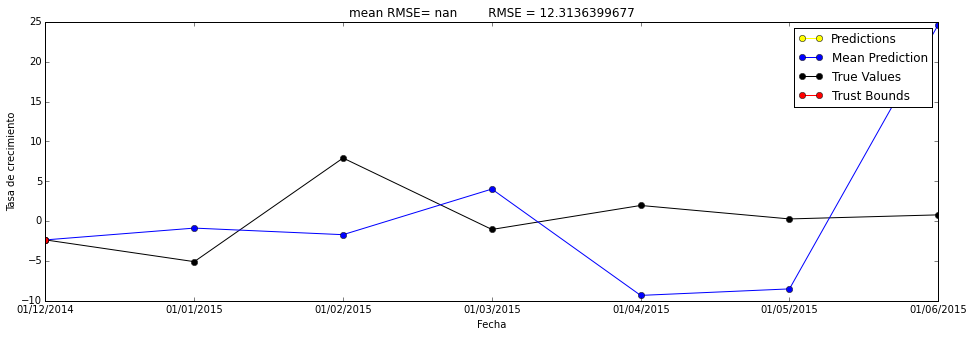

In [59]:
plot_TestSolutions(test_predictions[predsTest].as_matrix(),testmean.as_matrix(),TS,meantestRMSE,testRMSE,upperBound.as_matrix(),lowerBound.as_matrix())